<a href="https://colab.research.google.com/github/salehafzoon/Data-Science/blob/main/scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting started

In [1]:
from sklearn.datasets import load_iris

# bunch object contains iris dataset and its attributes
iris = load_iris()
type(iris)

sklearn.utils.Bunch

Each row is called observation/ record/ sample/ example/ instance

Each column is called feature/ predictor/ attribute/ independent variable/ input/ regressor 

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [2]:
print( type(iris.data))
print( type(iris.target))
print( iris.data.shape)
print( iris.target.shape)

X = iris.data
y = iris.target

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


# Training a ML model

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate the estimator
knn1 = KNeighborsClassifier(n_neighbors = 1)

print(knn1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


In [4]:
X_new = [[3,5,4,2],[5,4,3,2]]

knn1.fit(X,y)
print(knn1.predict(X_new))

knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(X,y)
print(knn5.predict(X_new))

[2 1]
[1 1]


In [5]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=120)
logreg.fit(X, y)

logreg.predict(X_new)

array([0, 0])

# Comparing ML models



> 1 : Train & Test on entire dataset


In [6]:
y_pred = logreg.predict(X)
y_knn1 = knn1.predict(X)
y_knn5 = knn5.predict(X)

len(y_pred)

150

In [ ]:
from sklearn import metrics

print( 'logreg training accuracy:',metrics.accuracy_score(y,y_pred))
print( 'knn1 training accuracy:',metrics.accuracy_score(y,y_knn1))
print( 'knn5 training accuracy:',metrics.accuracy_score(y,y_knn5))


logreg training accuracy: 0.9733333333333334
knn1 training accuracy: 1.0
knn5 training accuracy: 0.9666666666666667


-Creating unnecessary model called overfiting like KNN-1
- such model learn from noise data too

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size = 0.4, random_state = 4)

print(X_train.shape)
print(y_train.shape)

(90, 4)
(90,)


In [19]:
logreg.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn5.fit(X_train, y_train)

log_pred = logreg.predict(X_test)
knn1_pred = knn1.predict(X_test)
knn5_pred = knn5.predict(X_test)

In [20]:
from sklearn import metrics

print( 'logreg training accuracy:',metrics.accuracy_score(y_test,log_pred))
print( 'knn1 training accuracy:',metrics.accuracy_score(y_test,knn1_pred))
print( 'knn5 training accuracy:',metrics.accuracy_score(y_test,knn5_pred))


logreg training accuracy: 0.9666666666666667
knn1 training accuracy: 0.95
knn5 training accuracy: 0.9666666666666667


In [26]:
k_range = range(1,26)
scores = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test,pred))

Text(0, 0.5, 'Testing Accuracy')

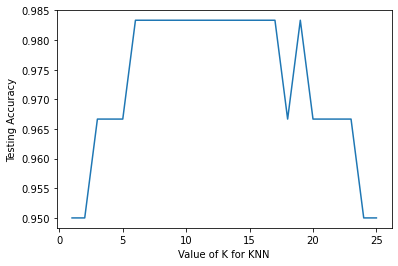

In [28]:
import matplotlib.pyplot as plt

plt.plot(k_range , scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- Trainig accuracy rises as model complexity increases
- Testing accuracy penalizes models that are too complex  or not complex enough

## Downsides of train/test split
- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation